## Énoncé :

Le nombre de naissances en France en 2014 est de 399 284 hommes contre 381 883 femmes (source : INED).

On souhaite tester l’équiprobabilité des naissances de femmes et d'hommes.

On pose :

La proportion d'hommes théorique est p0 = 0.5

L'hypothèse H0 est : p = p0

L'hypothèse H1 est : p > p0

Reste-t-on sur l'hypothèse H0 ou bien doit-on la rejeter ?

## Liens utiles

https://gallery.shinyapps.io/dist_calc/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

## Import des librairies

In [12]:
from math import sqrt
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

## Préparation des données

On prépare les différentes valeurs dont on pourrait avoir besoin :

- La fréquence d'hommes observée
- La proportion p0 (0.5)
- La variance de la loi binomiale théoriquement suivie par notre tirage
- L'écart-type de la loi binomiale théoriquement suivie par notre tirage
- L'écart-type moyen

In [13]:
hommes = 399284
femmes = 381883

n = hommes + femmes # Taille de l'échantillon
f_hommes = hommes / n # Fréquence d'hommes observée
f_femmes = femmes / n # Fréquence de femmes observée

p = 0.5 # Hypothèse H0

e = p*n
v = n*p*(1-p) # Variance de la loi H0
std = sqrt(v) # Ecart type de la loi H0
std_moy = std / n # Ecart type moyen

print(f"""
Taille de l'échantillon : {n:,}
Hommes : {hommes:,}
Femmes : {femmes:,}
Fréquence observvée : {f_hommes:.4f}
""")


Taille de l'échantillon : 781,167
Hommes : 399,284
Femmes : 381,883
Fréquence observvée : 0.5111



## Calculs des différentes valeurs 

Même si ce n'est pas demandé, on peut calculer l'intervalle de confiance au seuil de 5%, pour voir si notre fréquence observée est dedans. On souhaite regarder seulement à "droite", donc cet intervalle n'est pas pertinent car il contient des valeurs qui ne nous intéressent pas. Mais disons que si notre fréquence observée est dans cet intervalle, on peut d'ores-et-déjà valider l'hypothèse H0.

On calcule, par curiosité, le Percent-Point function au dessus duquel on est à 97.5%. Il est implicitement utilisé par la méthode précédente. On voit que pour une loi normale centrée réduite, dans 97.5% des cas, on sera sur une valeur supérieure ou égale à 1,96 z-score.

Enfin, on calcule la p-value qui nous intéresse puisque elle seule peut définitivement valider ou non l'hypothèse H0. On veut savoir quelle est l'aire la courbe où la variable suivant une loi normale est supérieure ou égale à notre fréquence observée notée f.

In [15]:
# Intervalle de fluctuation
print(norm.interval(0.95, p, std_moy))

# Percent-Point function
print(norm.ppf(0.975))

# p-value : calcul de l'aire sous la courbe pour une fréquence supérieure ou égale à f
print(norm.sf(f_hommes, p, std_moy))

(0.49889121804045816, 0.5011087819595419)
1.959963984540054
1.3655295002745935e-86


## Interprétations

La p-value est extrêmement faible, pour ne pas dire nulle. On peut donc rejeter l'hypothèse H0 selon laquelle notre échantillon appartient à une loi de probabilité de 50%.

D'ailleurs, l'intervalle de fluctuation nous met d'emblée sur la piste, puisqu'on voit qu'au seuil de 5%, notre fréquence observée n'est pas dedans.

## Traçons la loi normale

Pour s'assurer de nos résultats, on peut les vérifier graphiquement.

On trace une loi normale qui approche notre loi binomiale avec comme paramètres :

Espérance : la probabilité H0 qui est de 0.5

Ecart-type : l'écart-type divisé par le nombre d'individus

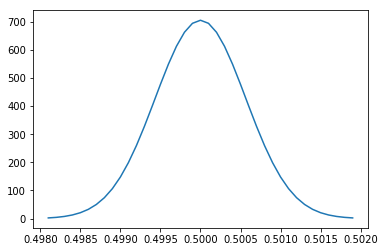

In [16]:
# On définit des limites permettant de conserver la partie la plus pertinente
x_axis = np.arange(0.4981, 0.5019, 0.0001)

# Et on plote :)
plt.plot(x_axis, norm.pdf(x_axis,p,std_moy))
plt.show()

In [17]:
std_moy

0.0005657154765535444

## Interprétations

On constate que la fréquence observée 0.51111 est encore bien plus loin à droite, tellement loin qu'elle sort de notre graphique car très proche de l'infiniment petit, ou plutôt très proche de la probabilité zéro.

Faisons-la rentrer dans le graphique de notre loi normale par curiosité :

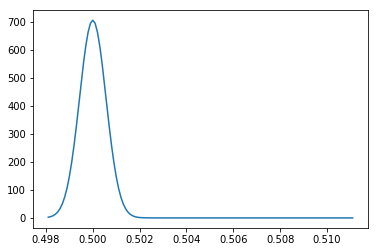

In [172]:
# On définit des limites permettant de conserver la partie la plus pertinente
x_axis = np.arange(0.4981, 0.5111, 0.0001)

# Et on plote :)
plt.plot(x_axis, norm.pdf(x_axis,p,std_moy))
plt.show()

C'est loin ! :)

## Simulations modifiant la taille de l'échantillon mais conservant la fréquence



In [208]:
echantillons = [100,1000,10000]

for x in echantillons:
    print(f"""
    n = {x}
    hommes = {f_hommes * x:.0f}
    femmes = {f_femmes * x:.0f}
    """)


    n = 100
    hommes = 51
    femmes = 49
    

    n = 1000
    hommes = 511
    femmes = 489
    

    n = 10000
    hommes = 5111
    femmes = 4889
    


## Calcul des p-values à partir des trois échantillons simulés ci-dessus

In [235]:
for x in echantillons:
    
    # On recalcule l'écart-type moyen pour un échantillon de x individus
    vx = x * p * (1-p)
    stdx = sqrt(vx)
    stdx_moy = stdx / x

    # On calcule et on affiche l'intervalle de confiance
    print(f"""
        [{x} individus]
        -
        Intervalle de confiance (à titre indicatif)
        {norm.interval(0.95, p, stdx_moy)}
        -
        P-Value (utile pour la prise de décision)
        {norm.sf(f, p, stdx_moy)}
    """)


        [100 individus]
        -
        Intervalle de confiance (à titre indicatif)
        (0.4020018007729973, 0.5979981992270027)
        -
        P-Value (utile pour la prise de décision)
        0.41186252602093665
    

        [1000 individus]
        -
        Intervalle de confiance (à titre indicatif)
        (0.4690102483847719, 0.5309897516152281)
        -
        P-Value (utile pour la prise de décision)
        0.24058631362704386
    

        [10000 individus]
        -
        Intervalle de confiance (à titre indicatif)
        (0.4902001800772997, 0.5097998199227003)
        -
        P-Value (utile pour la prise de décision)
        0.012954779865950616
    


---

## Question 1

#### Donnez la p-valeur du test de probabilité :

La p-value est 1.3655295002745935e-86 autrement dit infinie proche de zéro.

---

## Question 2

#### Accepte-t-on l'hypothèse d’équiprobabilité des naissances femmes-hommes au niveau de test 5% ?

Non, puisque la p-value est bien inférieure à 5%.

On rejette H0 et on accepte H1 sans le moindre doute, avec un risque infiniment faible.

---
## Question 3

#### Calcul du nombre d'hommes et de femmes avec des échantillons de 100, 1000 et 10000 individus, en conservant la même fréquence observée que sur notre échantillon initial

Pour n = 100, nous avons 51 hommes et 49 femmes

Pour n = 1000, nous avons 511 hommes et 49 femmes

Pour n = 10000, nous avons 5111 hommes et 4889 femmes

---

## Question 4

#### Pour chacun des 3 cas précédents, accepte-t-on l'hypothèse d’équiprobabilité des naissances femmes-hommes au niveau de test 5% ?

Pour 100 individus : oui, car la p-value est de 0,4118 (41%) : on accepte P = P0 = 50%

Pour 1000 individus : oui, car la p-value est de 0,2405 (24%) : on accepte P = P0 = 50%

Pour 10000 individus : non car la p-value est de 0,0129 (1,3%) : in rejette P = P0 = 50%, P est très certainement supérieur.

---

## Conclusion

Ce qui nous permet d'affirmer de manière certaine le rejet de H0 dans l'échantillon de départ, c'est sa très grande taille. Mais si nous avions observé la même fréquence sur un petit échantillon, alors on aurait pu accepter l'hypothèse d'une proportion à 50%.